In [1]:
import os
os.getcwd()
os.chdir('F:\\Simplilearn\\Assignment\\Data_sets')

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

### Reading dat files

In [3]:
df_Movies = pd.read_csv('movies.dat', sep='::', engine = 'python',
header = None, names = ['MovieID','Title','Genres'])
df_Users = pd.read_csv('users.dat', sep='::', engine = 'python',
header = None, names = ['UserID','Gender','Age','Occupation','Zip-Code'])
df_Ratings = pd.read_csv('ratings.dat', sep='::', engine = 'python',
header = None, names = ['UserID','MovieID','Rating','Timestamp'])

In [4]:
print(df_Movies.head())

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [5]:
print(df_Users.head())

   UserID Gender  Age  Occupation Zip-Code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [6]:
print(df_Ratings.head())

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


### New dataset [Master_Data] with the MovieID, Title, MovieID, Title, UserID, Age, Gender, Occupation, Rating

#### Merging two tables: df_Movies_User = df_Movies and df_Ratings

In [9]:
#Column 'MovieID' is available in df_Movies and df_Ratings
df_Movies_Rating = pd.merge(df_Movies, df_Ratings, on='MovieID')

In [10]:
df_Movies_Rating.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


#### (ii) Merging all three tables: df_Movies_Rating_User = df_Movies_User and df_Users

In [11]:
df_Movies_Rating_User = pd.merge(df_Movies_Rating, df_Users, on= 'UserID')
df_Movies_Rating_User.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


#### Column zip-code, Timestamp not required for df_Master, droping these columns

In [12]:
df_Master_Data = df_Movies_Rating_User.drop(['Zip-Code', 'Timestamp'], axis=1)
df_Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10


#### User Age Distribution

In [13]:
age_dist = df_Users.groupby('Age').size()
print(age_dist)

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64


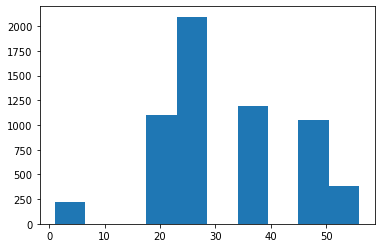

In [14]:
plt.hist(data=age_dist, x=[df_Users.Age])
#for index,data in enumerate(age_dist):
#plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()

### User rating of the movie “Toy Story”

In [15]:
ToyStory_data = df_Master_Data[df_Master_Data.Title=='Toy Story (1995)']
ToyStory_data.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,F,50,9
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,M,25,12
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,M,25,17
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,F,35,1


In [16]:
ToyStory_data.groupby('Rating').size()

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

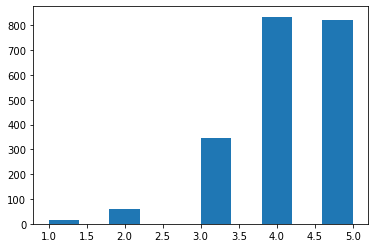

In [17]:
plt.hist(x=ToyStory_data['Rating'], bins=10)
plt.show()

### Top 25 movies by viewership rating

In [18]:
Movies_Ratings = df_Movies_Rating.groupby('Title')['Rating'].mean().sort_values(ascending = False)
Movies_Ratings.head()

Title
Ulysses (Ulisse) (1954)     5.0
Lured (1947)                5.0
Follow the Bitch (1998)     5.0
Bittersweet Motel (2000)    5.0
Song of Freedom (1936)      5.0
Name: Rating, dtype: float64

In [19]:
Rating_Count = df_Movies_Rating.groupby('Title')['Rating']
Rating_Count = Rating_Count.count().sort_values(ascending = False)
Rating_Count.head()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: Rating, dtype: int64

In [20]:
Rating_Count_Avg = pd.DataFrame(data=Movies_Ratings)
Rating_Count_Avg['number_of_ratings'] = pd.DataFrame(Rating_Count)
Rating_Count_Avg.head()

,Rating,number_of_ratings
Title,,
Ulysses (Ulisse) (1954),5.0,1
Lured (1947),5.0,1
Follow the Bitch (1998),5.0,1
Bittersweet Motel (2000),5.0,1
Song of Freedom (1936),5.0,1


In [21]:
Top_25_Movies = Rating_Count_Avg[Rating_Count_Avg['number_of_ratings']>25]
#Ignored number_of_ratings less than 25
Top_25_Movies.head(25)

,Rating,number_of_ratings
Title,,
Sanjuro (1962),4.608696,69
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.560510,628
"Shawshank Redemption, The (1994)",4.554558,2227
"Godfather, The (1972)",4.524966,2223
"Close Shave, A (1995)",4.520548,657
"Usual Suspects, The (1995)",4.517106,1783
Schindler's List (1993),4.510417,2304
"Wrong Trousers, The (1993)",4.507937,882
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.491489,470


###  Ratings for all the movies reviewed by for a user id = 2696

In [22]:
User_2696 = df_Master_Data[df_Master_Data['UserID']==2696]
User_2696

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,M,25,7
991036,800,Lone Star (1996),Drama|Mystery,2696,5,M,25,7
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,M,25,7
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,M,25,7
991039,1258,"Shining, The (1980)",Horror,2696,4,M,25,7
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,M,25,7
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,M,25,7
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,M,25,7
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,M,25,7
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,M,25,7


In [24]:
#Unique Genres
#Split array with '|'
Genres_data = df_Movies.Genres.str.split('|').values
#Converted list in list to list and added to set to make ubique
Unique_Genres_data = set([item for sublist in Genres_data for item in sublist])
Unique_Genres_data

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [25]:
#One-Hot Encoding with separate column for each genre category

In [27]:
lbl_genre = []
lst_Unique_Genres_data = list(Unique_Genres_data)
for gen in range(len(lst_Unique_Genres_data)):
    lbl_genre.append((gen+1,lst_Unique_Genres_data[gen]))
print(lbl_genre)

[(1, 'Adventure'), (2, 'Fantasy'), (3, 'Horror'), (4, 'Romance'), (5, 'Drama'), (6, 'Comedy'), (7, 'Sci-Fi'), (8, 'Action'), (9, 'Film-Noir'), (10, 'War'), (11, 'Animation'), (12, 'Mystery'), (13, 'Musical'), (14, 'Thriller'), (15, 'Western'), (16, 'Documentary'), (17, 'Crime'), (18, "Children's")]


In [28]:
Genre_DF = pd.DataFrame(data=df_Movies)
Genre_DF.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
Genre_DF.columns

Index(['MovieID', 'Title', 'Genres'], dtype='object')

In [31]:
#Separate columns created for each genre
for q in lst_Unique_Genres_data:
    Genre_DF[q] = Genre_DF.Genres.map(lambda x: q in x)
Genre_DF.head()

,MovieID,Title,Genres,Adventure,Fantasy,Horror,Romance,Drama,Comedy,Sci-Fi,...,Film-Noir,War,Animation,Mystery,Musical,Thriller,Western,Documentary,Crime,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
1,2,Jumanji (1995),Adventure|Children's|Fantasy,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


### One-Hot Encoding

In [32]:
#One Hot Encoding
df_OneHtEnc = pd.concat([Genre_DF.Genres,Genre_DF.iloc[:, 0:3], Genre_DF.iloc[:, 3:].astype(int)], axis=1)
df_OneHtEnc = df_OneHtEnc.drop(['Genres', 'MovieID'], axis=1) #Dropped column Genres and MovieID
df_OneHtEnc_sort = df_OneHtEnc.sort_index(axis=1) #Sorting columns in ascending order
first_column = df_OneHtEnc_sort.pop('Title') #renumbering 'Title' column in Index 0
df_OneHtEnc_sort.insert(0, 'Title', first_column) #renumbering 'Title' column in Index 0
df_OneHtEnc_sort.head()

,Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
#Features Affecting the rating and development of model

In [34]:
df_Effecting_data = df_Movies_Rating_User.head(500)
df_Effecting_data.shape

(500, 10)

In [35]:
##Importing LabelEncoder to fit the model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_Effecting_data['Age'])
Aff_Age = le.transform(df_Effecting_data['Age'])
Aff_Age

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [36]:
le.fit(df_Effecting_data['Occupation'])
Aff_Occu = le.transform(df_Effecting_data['Occupation'])
Aff_Occu

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [37]:
le.fit(df_Effecting_data['MovieID'])
Aff_Mov_ID = le.transform(df_Effecting_data['MovieID'])
Aff_Mov_ID

array([  0,  15,  25,  40,  84,  86,  98, 103, 104, 107, 111, 113, 117,
       122, 137, 141, 147, 162, 166, 167, 171, 183, 195, 197, 202, 208,
       210, 213, 230, 232, 253, 261, 263, 270, 271, 274, 276, 284, 289,
       293, 294, 296, 309, 311, 315, 316, 317, 319, 324, 330, 332, 339,
       356,   0,   6,  10,  15,  33,  42,  49,  64,  66,  68,  69,  95,
        98, 100, 104, 106, 127, 135, 137, 142, 155, 166, 168, 171, 173,
       180, 184, 194, 203, 214, 221, 224, 232, 233, 245, 248, 259, 268,
       269, 272, 273, 277, 278, 279, 289, 295, 297, 301, 303, 318, 320,
       326, 328, 329, 356, 363, 364, 367, 369, 370, 371, 372, 373, 374,
       375, 377, 378, 379, 380, 381, 383,   0,   2,   4,   5,   6,   7,
         8,  11,  12,  13,  17,  19,  21,  22,  23,  25,  26,  28,  30,
        37,  39,  41,  42,  43,  46,  47,  49,  56,  59,  60,  68,  70,
        74,  76,  77,  78,  79,  80,  81,  83,  84,  87,  93,  94,  99,
       107, 109, 114, 115, 134, 165, 174, 186, 203, 204, 209, 21

In [38]:
df_Effecting_data['New_Age'] = Aff_Age
df_Effecting_data['New_Occupation'] = Aff_Occu
df_Effecting_data['New_MovieID'] = Aff_Mov_ID

<ipython-input-38-91d1e43d812c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Effecting_data['New_Age'] = Aff_Age
<ipython-input-38-91d1e43d812c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Effecting_data['New_Occupation'] = Aff_Occu
<ipython-input-38-91d1e43d812c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [39]:
df_Eff_inp = df_Effecting_data[['New_Age', 'New_Occupation', 'New_MovieID']]
df_Eff_opt = df_Effecting_data['Rating']
df_Eff_inp.head()

,New_Age,New_Occupation,New_MovieID
0,0,2,0
1,0,2,15
2,0,2,25
3,0,2,40
4,0,2,84


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_Eff_inp, df_Eff_opt, test_size = 0.25)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 3), (125, 3), (375,), (125,))

In [42]:
from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

C:\Users\sguram\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
result = logitReg.predict(x_test)

In [45]:
estimated = pd.Series(result, name = 'Estimated Values')

In [46]:
Final_res = pd.concat([y_test, estimated], axis=1)

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [48]:
print(accuracy_score(y_test, result))
print(confusion_matrix(y_test, result))
print(classification_report(y_test, result))

0.352
[[ 0  0  7  0]
 [ 0  0 29  5]
 [ 0  0 37 11]
 [ 0  0 29  7]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        34
           4       0.36      0.77      0.49        48
           5       0.30      0.19      0.24        36

    accuracy                           0.35       125
   macro avg       0.17      0.24      0.18       125
weighted avg       0.23      0.35      0.26       125



C:\Users\sguram\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sguram\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sguram\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
#KNN from sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
print(knn)

KNeighborsClassifier(n_neighbors=1)


In [50]:
knn.fit(x_train, y_train) #Fit KNN for movie and userID as feature

KNeighborsClassifier(n_neighbors=1)

In [51]:
predi = knn.predict(x_test) #Testing
predi

array([5, 5, 2, 4, 3, 5, 3, 3, 4, 4, 4, 4, 4, 2, 5, 5, 3, 4, 4, 5, 5, 5,
       5, 4, 5, 5, 5, 4, 3, 3, 4, 5, 5, 3, 4, 3, 3, 3, 5, 4, 2, 4, 5, 5,
       3, 5, 3, 3, 4, 5, 3, 5, 5, 5, 3, 4, 3, 4, 3, 5, 3, 3, 4, 5, 5, 4,
       5, 4, 3, 4, 4, 3, 5, 5, 5, 3, 3, 5, 3, 5, 4, 4, 4, 4, 5, 4, 4, 3,
       5, 4, 2, 3, 4, 5, 3, 4, 3, 4, 5, 4, 5, 5, 3, 4, 4, 4, 5, 4, 4, 4,
       5, 4, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 5, 5, 4], dtype=int64)

In [52]:
#Evaluate accuracy for 500 users
from sklearn import metrics
acc_knn = metrics.accuracy_score(y_test,predi)
print('KNN accuracy for 500 users = ', acc_knn)

KNN accuracy for 500 users =  0.336


In [53]:
#Matrix Confusion
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predi))

[[ 0  4  3  0]
 [ 2 12 10 10]
 [ 2 13 16 17]
 [ 1  8 13 14]]


In [54]:
#Report
print(metrics.classification_report(y_test, predi))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         7
           3       0.32      0.35      0.34        34
           4       0.38      0.33      0.36        48
           5       0.34      0.39      0.36        36

    accuracy                           0.34       125
   macro avg       0.26      0.27      0.26       125
weighted avg       0.33      0.34      0.33       125

